# Insights Behind the Airbnb Customer Reviews: Sentiment Analysis with Vader and NLP in Python


## Welcome to My Udacity Data Science Nano Degree Projects!
In this notebook, I will explore the Airbnb Seattle Datasets that follow the below structure and anwser the below business questions:

### Business Questions
- Do people tend to leave bad reviews or good reviews on Airbnb? Are the sentiment differ from neighbourhoods?
- Are the positive sentiment correlated with other metrics, like host response time?
- Can you describe the vibe of each Seattle neighborhood based on customer's review?


The analysis is done using explorative data analysis and unsupervised sentiment analysis using a pre-trained model called Vader and NLTK to do text tagging and extraction.


# Data
### Seattle Airbnb Open Data
Datasets used: https://www.kaggle.com/datasets/airbnb/seattle?select=listings.csv

## Table of Content

- Getting Started, importing and understanding data 
- Data Preprocessing and Preparation, cleaning data, Feature Engineering
- Unsupervised Sentiment Analysis
- Sentiment Prediction using Vader
- Visulization and answering business questions
- Text Analysis on describing different Seattle neighbourhood vibes

# Getting Started

In [1]:
from datetime import datetime, date
import numpy as np
import pandas as pd

#For sentiment Analysis
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# For text analysis and categorizing
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import wordnet
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# For visualization
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yuhuai_lin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuhuai_lin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yuhuai_lin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yuhuai_lin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Setting jupyter table display options

In [2]:
pd.set_option('display.width', 1000)
pd.set_option('max_columns', 500)
pd.set_option('display.max_rows', 500)

## Gather: Import Data

In [4]:
calendar = pd.read_csv('data/calendar.csv')
listings = pd.read_csv('data/listings.csv')
reviews = pd.read_csv('data/reviews.csv')

In [5]:

print(listings.shape)
listings.sample(2)

(3818, 92)


id                           listing_url       scrape_id last_scraped                                 name                                            summary                                              space                                        description experiences_offered                              neighborhood_overview                                              notes                                            transit                                      thumbnail_url                                         medium_url                                        picture_url                                     xl_picture_url   host_id                                    host_url host_name  host_since                             host_location                                         host_about host_response_time host_response_rate host_acceptance_rate host_is_superhost                                 host_thumbnail_url                                   host_picture_url  \
1751  3168651  https://www.airbnb.com/rooms/3168651  20160104002432   2016-01-04     Eclectic Alki Beach Private Room  Apartment on top floor of a turn of century  t...  The room is at the back of a railroad apartmen...  Apartment on top floor of a turn of century  t...                none  Alki is an area with recreational history.  Lu...  *THIS IS A THIRD FLOOR WALK UP & CATS LIVE HER...  West Seattle is 15 to 20 minutes  to  SEATAC A...  https://a1.muscache.com/ac/pictures/40433043/b...  https://a1.muscache.com/im/pictures/40433043/b...  https://a1.muscache.com/ac/pictures/40433043/b...  https://a1.muscache.com/ac/pictures/40433043/b...   3319942   https://www.airbnb.com/users/show/3319942      Jami  2012-08-20  West New York, New Jersey, United States  I'm a professional woman that's involved in se...     within an hour               100%                  NaN                 f  https://a2.muscache.com/ac/users/3319942/profi...  https://a2.muscache.com/ac/users/3319942/profi...   
249   6781308  https://www.airbnb.com/rooms/6781308  20160104002432   2016-01-04  Heart of Seattle, minutes to it all  Our beautiful newly renovated vacation rental ...  Newly renovated one bedroom, one bath apartmen...  Our beautiful newly renovated vacation rental ...                none  Location is everything! Our apartment is locat...  Please let us know if you will be traveling wi...  Many of our guests bike or walk. If you choose...  https://a2.muscache.com/ac/pictures/95139481/2...  https://a2.muscache.com/im/pictures/95139481/2...  https://a2.muscache.com/ac/pictures/95139481/2...  https://a2.muscache.com/ac/pictures/95139481/2...  33944952  https://www.airbnb.com/users/show/33944952   Timothy  2015-05-21        Seattle, Washington, United States                                                NaN     within an hour                94%                 100%                 t  https://a0.muscache.com/ac/users/33944952/prof...  https://a0.muscache.com/ac/users/33944952/prof...   

     host_neighbourhood  host_listings_count  host_total_listings_count                                 host_verifications host_has_profile_pic host_identity_verified                                             street neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed     city state zipcode   market smart_location country_code        country   latitude   longitude is_location_exact property_type        room_type  accommodates  bathrooms  bedrooms  beds  bed_type                                          amenities  square_feet    price weekly_price monthly_price security_deposit cleaning_fee  guests_included extra_people  minimum_nights  maximum_nights calendar_updated has_availability  availability_30  availability_60  availability_90  availability_365 calendar_last_scraped  number_of_reviews first_review last_review  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  \
1751              

In [6]:
print(reviews.shape)
reviews.head()

(84849, 6)


listing_id        id        date  reviewer_id reviewer_name                                           comments
0     7202016  38917982  2015-07-19     28943674        Bianca  Cute and cozy place. Perfect location to every...
1     7202016  39087409  2015-07-20     32440555         Frank  Kelly has a great room in a very central locat...
2     7202016  39820030  2015-07-26     37722850           Ian  Very spacious apartment, and in a great neighb...
3     7202016  40813543  2015-08-02     33671805        George  Close to Seattle Center and all it has to offe...
4     7202016  41986501  2015-08-10     34959538          Ming  Kelly was a great host and very accommodating ...

In [7]:
print(calendar.shape)
calendar.head()

(1393570, 4)


listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

# Data Preprocessing and Preparation, Cleaing data, Feature Engineering


### 1. Convert strings of true, false to 1 and 0 in specific columns

In [8]:
def convert_tf(df, columns, true_value = 't'):
    """Convert a dataframe column from String t/f (true/false) to 1 and 0"""
    for c in columns:
        df[c] = [1 if i==true_value else 0 for i in df[c]]

In [9]:
convert_tf(listings, ['host_is_superhost','is_location_exact', 'has_availability','requires_license', 'instant_bookable',  'require_guest_profile_picture','require_guest_phone_verification'],
          't')

In [10]:
convert_tf(calendar, ['available'], 't')

### 2. Conver the price and extra fee column to numeric

In [11]:
calendar.head(2)

listing_id        date  available   price
0      241032  2016-01-04          1  $85.00
1      241032  2016-01-05          1  $85.00

In [12]:
def convert_str_to_num(df, column_list):
    """convert the price columns from $100 to a numeric 100"""
    for c in column_list:
        df[c] = df[c].str.replace("[$, ]", "").astype("float")

In [13]:
convert_str_to_num(calendar, ['price'])

/var/folders/72/db0symc92szcy4fk3sy8zfc00000gn/T/ipykernel_2768/1604728762.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df[c] = df[c].str.replace("[$, ]", "").astype("float")


In [14]:
convert_str_to_num(listings, ['price','extra_people'])

/var/folders/72/db0symc92szcy4fk3sy8zfc00000gn/T/ipykernel_2768/1604728762.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df[c] = df[c].str.replace("[$, ]", "").astype("float")


In [15]:
calendar.head(2)

listing_id        date  available  price
0      241032  2016-01-04          1   85.0
1      241032  2016-01-05          1   85.0

In [16]:
listings[['price','extra_people']].head(2)

price  extra_people
0   85.0           5.0
1  150.0           0.0

### 3. Create calendar_df: group by the listing and check the average price of each listing
- we probably don't need daily price information in this analysis

In [17]:
calendar_df = calendar[calendar['available']== 1].groupby('listing_id')['price'].mean().reset_index()

In [18]:
calendar_df.sample(5)

listing_id       price
2670     7838294  225.000000
1482     4783585  247.023392
975      3380159  234.513514
358       935862  292.546218
3613     9901852  110.549296

### 4. Drop some uneeded columns in the listing datasets, mostly website URLs

In [19]:
listings = listings.drop([ 'host_thumbnail_url', 'host_picture_url', 'host_url','xl_picture_url', 'picture_url','thumbnail_url', 'medium_url', 'listing_url',
                         'scrape_id', 'last_scraped', 'name', 'host_id', 'host_name','calendar_last_scraped' ]  , axis=1)

In [20]:
listings.head(2)

id                                            summary                                              space                                        description experiences_offered                              neighborhood_overview                                              notes                                            transit  host_since                       host_location                                         host_about  host_response_time host_response_rate host_acceptance_rate  host_is_superhost host_neighbourhood  host_listings_count  host_total_listings_count                                 host_verifications host_has_profile_pic host_identity_verified                                             street neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed     city state zipcode   market smart_location country_code        country   latitude   longitude  is_location_exact property_type        room_type  accommodates  bathrooms  bedrooms  beds  bed_type  \
0  241032                                                NaN  Make your self at home in this charming one-be...  Make your self at home in this charming one-be...                none                                                NaN                                                NaN                                                NaN  2011-08-11  Seattle, Washington, United States  I am an artist, interior designer, and run a s...  within a few hours                96%                 100%                  0         Queen Anne                  3.0                        3.0               ['email', 'phone', 'reviews', 'kba']                    t                      t      Gilman Dr W, Seattle, WA 98119, United States    Queen Anne        West Queen Anne                   Queen Anne  Seattle    WA   98119  Seattle    Seattle, WA           US  United States  47.636289 -122.371025                  1     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed   
1  953595  Chemically sensitive? We've removed the irrita...  Beautiful, hypoallergenic apartment in an extr...  Chemically sensitive? We've removed the irrita...                none  Queen Anne is a wonderful, truly functional vi...  What's up with the free pillows?  Our home was...  Convenient bus stops are just down the block, ...  2013-02-21  Seattle, Washington, United States  Living east coast/left coast/overseas.  Time i...      within an hour                98%                 100%                  1         Queen Anne                  6.0                        6.0  ['email', 'phone', 'facebook', 'linkedin', 're...                    t                      t  7th Avenue West, Seattle, WA 98119, United States    Queen Anne        West Queen Anne                   Queen Anne  Seattle    WA   98119  Seattle    Seattle, WA           US  United States  47.639123 -122.365666                  1     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed   

                                           amenities  square_feet  price weekly_price monthly_price security_deposit cleaning_fee  guests_included  extra_people  minimum_nights  maximum_nights calendar_updated  has_availability  availability_30  availability_60  availability_90  availability_365  number_of_reviews first_review last_review  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  requires_license  license jurisdiction_names  instant_bookable cancellation_policy  require_guest_profile_picture  require_guest_phone_verification  calculated_host_listings_count  reviews_per_month  
0  {TV,"Cable TV",Internet,"Wireless Internet","A...          NaN   85.0          NaN           NaN              NaN          NaN                2           5.0               1             365      4 weeks ago                 1               14               41               71               346            

### 5. Convert "host_since" column into a number instead of a date
We can utlize hosts' years of experience as a potential feature

In [21]:
listings['host_since']= pd.to_datetime(listings['host_since'])

In [22]:
# Know the last date of this data sets so that we have an end date to calculate days of experience
date_end = calendar['date'].max()
print(date_end)

2017-01-02


In [23]:
listings['host_exp_days']  = (datetime.strptime(date_end, '%Y-%m-%d') - listings['host_since'])
listings['host_exp_days'] = listings['host_exp_days'].dt.days

In [24]:
listings['host_exp_days'].head()

0    1971.0
1    1411.0
2     935.0
3    1153.0
4    1861.0
Name: host_exp_days, dtype: float64

### 6. Create another column that shows hosts' experience in number of years

In [25]:
listings['host_exp_year']=listings['host_exp_days']/365

In [26]:
listings['host_exp_year']

0       5.400000
1       3.865753
2       2.561644
3       3.158904
4       5.098630
          ...   
3813    1.726027
3814    1.221918
3815    1.010959
3816    2.000000
3817    2.693151
Name: host_exp_year, Length: 3818, dtype: float64

### 7. Convert host response rate and acceptance into a proper float format
The current format is a weird string

In [27]:
listings[['host_response_rate', 'host_acceptance_rate']].head()

host_response_rate host_acceptance_rate
0                96%                 100%
1                98%                 100%
2                67%                 100%
3                NaN                  NaN
4               100%                  NaN

In [28]:
def convert_rate_col(df, columns):
    "convert the provided list of column from string (100%) to float (1.00)"
    for column in columns:
        df[column] = df[column].str.replace("%", "").astype("float")
        df[column] = df[column]/100


In [29]:
convert_rate_col(listings, ['host_response_rate', 'host_acceptance_rate'])

In [30]:
listings[['host_response_rate', 'host_acceptance_rate']].head()

host_response_rate  host_acceptance_rate
0                0.96                   1.0
1                0.98                   1.0
2                0.67                   1.0
3                 NaN                   NaN
4                1.00                   NaN

# Missing Data

### Check missing data

In [36]:
np.sum(listings.isnull())==0

id                                   True
summary                             False
space                               False
description                          True
experiences_offered                  True
neighborhood_overview               False
notes                               False
transit                             False
host_since                          False
host_location                       False
host_about                          False
host_response_time                  False
host_response_rate                  False
host_acceptance_rate                False
host_is_superhost                    True
host_neighbourhood                  False
host_listings_count                 False
host_total_listings_count           False
host_verifications                   True
host_has_profile_pic                False
host_identity_verified              False
street                               True
neighbourhood                       False
neighbourhood_cleansed            

In [37]:
np.sum(reviews.isnull())==0

listing_id       True
id               True
date             True
reviewer_id      True
reviewer_name    True
comments         True
compound         True
dtype: bool

In [38]:
np.sum(calendar.isnull())==0

listing_id     True
date           True
available      True
price         False
dtype: bool

# Unsupervised Sentiment Prediction & Analysis

### 1. Drop the rows with missing comments in the reviews data

In [31]:
reviews = reviews.dropna(subset=['comments'])

### 2. Initiate a Sentiment Intensity Analyzer and output an sentiment score prediction based on the comments

In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [33]:
reviews.head()

listing_id        id        date  reviewer_id reviewer_name                                           comments
0     7202016  38917982  2015-07-19     28943674        Bianca  Cute and cozy place. Perfect location to every...
1     7202016  39087409  2015-07-20     32440555         Frank  Kelly has a great room in a very central locat...
2     7202016  39820030  2015-07-26     37722850           Ian  Very spacious apartment, and in a great neighb...
3     7202016  40813543  2015-08-02     33671805        George  Close to Seattle Center and all it has to offe...
4     7202016  41986501  2015-08-10     34959538          Ming  Kelly was a great host and very accommodating ...

# Sentiment Prediction using Vader
#### Getting a predicted sentiment compound scores using Vader Sentiment Intensity Analyzer and add it as a column

In [34]:
function = lambda title: analyser.polarity_scores(title)['compound']
reviews['compound'] =reviews['comments'].apply(function)

In [35]:
reviews.head()

listing_id        id        date  reviewer_id reviewer_name                                           comments  compound
0     7202016  38917982  2015-07-19     28943674        Bianca  Cute and cozy place. Perfect location to every...    0.7901
1     7202016  39087409  2015-07-20     32440555         Frank  Kelly has a great room in a very central locat...    0.9875
2     7202016  39820030  2015-07-26     37722850           Ian  Very spacious apartment, and in a great neighb...    0.8718
3     7202016  40813543  2015-08-02     33671805        George  Close to Seattle Center and all it has to offe...    0.8313
4     7202016  41986501  2015-08-10     34959538          Ming  Kelly was a great host and very accommodating ...    0.9783

### Adding positive scores

In [39]:
function = lambda title: analyser.polarity_scores(title)['pos']
reviews['positive_score'] =reviews['comments'].apply(function)

In [41]:
reviews.head()

listing_id        id        date  reviewer_id reviewer_name                                           comments  compound  positive_score
0     7202016  38917982  2015-07-19     28943674        Bianca  Cute and cozy place. Perfect location to every...    0.7901           0.538
1     7202016  39087409  2015-07-20     32440555         Frank  Kelly has a great room in a very central locat...    0.9875           0.360
2     7202016  39820030  2015-07-26     37722850           Ian  Very spacious apartment, and in a great neighb...    0.8718           0.164
3     7202016  40813543  2015-08-02     33671805        George  Close to Seattle Center and all it has to offe...    0.8313           0.196
4     7202016  41986501  2015-08-10     34959538          Ming  Kelly was a great host and very accommodating ...    0.9783           0.319

# Rule based Sentiment Classification using the predicted score
### Based on the sentiment score, classify the type of customer review sentiment into positive, negative and neutral


#### About the Scoring
The output from Vader sentiment Analyzer - compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

- positive sentiment: compound score >= 0.05
- neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
- negative sentiment: compound score <= -0.05

In [42]:
def func(x):
    if x > 0.5:
        return "positive"
    elif x < -0.5:
        return "negative"
    else:
        return 'neutral'
    # Add elif statements....


reviews['sentiment'] = reviews['compound'].apply(func)

In [43]:
reviews.sample(2)

listing_id        id        date  reviewer_id reviewer_name                                           comments  compound  positive_score sentiment
4802      6956938  37247027  2015-07-05     16401627         Sarah  The Studio on the Green is a welcome oasis.  T...    0.9666           0.265  positive
21678     6823781  55252427  2015-11-29     11495472         Kathe  The listing matched the reality.  Nice, clean,...    0.7953           0.108  positive

# Some Data processing again

### Aggregate the review data based on sentiment classification we got above and join it with the listing data sets.

In [44]:
reviews_agg =  reviews.groupby(['listing_id', 'sentiment'])['positive_score', 'compound'].mean().reset_index()

/var/folders/72/db0symc92szcy4fk3sy8zfc00000gn/T/ipykernel_2768/1405783885.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  reviews_agg =  reviews.groupby(['listing_id', 'sentiment'])['positive_score', 'compound'].mean().reset_index()


In [45]:
reviews_agg.head()

listing_id sentiment  positive_score  compound
0        4291  negative        0.027000 -0.814900
1        4291   neutral        0.000000  0.000000
2        4291  positive        0.287125  0.922616
3        5682   neutral        0.218750  0.344983
4        5682  positive        0.270134  0.922032

In [46]:
df_all =  pd.merge(listings, reviews, how='inner', left_on=['id'], right_on=['listing_id'])

In [47]:
df_all.head(2)

id_x summary                                              space                                        description experiences_offered neighborhood_overview notes transit host_since                       host_location                                         host_about  host_response_time  host_response_rate  host_acceptance_rate  host_is_superhost host_neighbourhood  host_listings_count  host_total_listings_count                    host_verifications host_has_profile_pic host_identity_verified                                         street neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed     city state zipcode   market smart_location country_code        country   latitude   longitude  is_location_exact property_type        room_type  accommodates  bathrooms  bedrooms  beds  bed_type                                          amenities  square_feet  price weekly_price monthly_price security_deposit cleaning_fee  guests_included  extra_people  minimum_nights  \
0  241032     NaN  Make your self at home in this charming one-be...  Make your self at home in this charming one-be...                none                   NaN   NaN     NaN 2011-08-11  Seattle, Washington, United States  I am an artist, interior designer, and run a s...  within a few hours                0.96                   1.0                  0         Queen Anne                  3.0                        3.0  ['email', 'phone', 'reviews', 'kba']                    t                      t  Gilman Dr W, Seattle, WA 98119, United States    Queen Anne        West Queen Anne                   Queen Anne  Seattle    WA   98119  Seattle    Seattle, WA           US  United States  47.636289 -122.371025                  1     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...          NaN   85.0          NaN           NaN              NaN          NaN                2           5.0               1   
1  241032     NaN  Make your self at home in this charming one-be...  Make your self at home in this charming one-be...                none                   NaN   NaN     NaN 2011-08-11  Seattle, Washington, United States  I am an artist, interior designer, and run a s...  within a few hours                0.96                   1.0                  0         Queen Anne                  3.0                        3.0  ['email', 'phone', 'reviews', 'kba']                    t                      t  Gilman Dr W, Seattle, WA 98119, United States    Queen Anne        West Queen Anne                   Queen Anne  Seattle    WA   98119  Seattle    Seattle, WA           US  United States  47.636289 -122.371025                  1     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...          NaN   85.0          NaN           NaN              NaN          NaN                2           5.0               1   

   maximum_nights calendar_updated  has_availability  availability_30  availability_60  availability_90  availability_365  number_of_reviews first_review last_review  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  requires_license  license jurisdiction_names  instant_bookable cancellation_policy  require_guest_profile_picture  require_guest_phone_verification  calculated_host_listings_count  reviews_per_month  host_exp_days  host_exp_year  listing_id    id_y        date  reviewer_id reviewer_name                                           comments  compound  positive_score sentiment  
0             365      4 weeks ago                 1               14               41               71               346                207   2011-11-01  2016-01-02                  95.0                    10.0                       10.0                   10.0                         10.0                  

# Visualizations and anwsering business questions!

##  Which neighbors in Seattle have most of the Airbnb listings?

### Anwsering Questions 1. Do people tend to leave comment about bad reviews or good reviews? Are the sentiment differ from neighbourhoods?

In [48]:
df_group = df_all.groupby(['sentiment', 'neighbourhood']).size().reset_index().rename(columns={0: 'count_reviews'})

In [49]:
df_group.head()

sentiment neighbourhood  count_reviews
0  negative          Alki              2
1  negative      Atlantic              9
2  negative       Ballard             26
3  negative      Belltown             22
4  negative   Bitter Lake              2

### Select the top 5 neighbourhoods in Seattle based on the number of reviews and plot the review pie chart

In [50]:
df_top_neighbour_list= df_group.groupby(['neighbourhood' ])['count_reviews'].sum().sort_values(ascending = False).reset_index().iloc[:5, 0].unique().tolist()

In [51]:
df_top_neighbour_list

['Capitol Hill', 'Ballard', 'Minor', 'Queen Anne', 'Belltown']

### Filter the top 5 neighbours in the grouped dataframe

In [52]:
df_top_neighbour = df_group[df_group['neighbourhood'].isin(df_top_neighbour_list)]

In [53]:
df_top_neighbour [df_top_neighbour ['neighbourhood']=='Capitol Hill']

sentiment neighbourhood  count_reviews
8    negative  Capitol Hill             48
65    neutral  Capitol Hill            381
142  positive  Capitol Hill           8272

## Creating charts for review distribution for top 5 neighbourhoods

Before creating subplot using plotly, need to pivot the table

In [54]:
# pivot the table
pf = df_top_neighbour .pivot_table(values='count_reviews', index=['sentiment'], 
               columns='neighbourhood', aggfunc='sum').reset_index('sentiment')
pf.head()

neighbourhood sentiment  Ballard  Belltown  Capitol Hill  Minor  Queen Anne
0              negative       26        22            48     28          23
1               neutral      188       196           381    207         171
2              positive     6896      4113          8272   4711        4312

In [55]:
labels = ['nagative', 'neutral', 'positive']
subplot_titles = ['Ballard','Belltown','Capitol Hill', 'Minor', 'Queen Anne']
fig = make_subplots(rows=3, cols=2, specs =[[{"type": "domain"}, {"type": "domain"}],[{"type": "domain"}, {"type": "domain"}], [{"type": "domain"}, {"type": "domain"}]],
                   subplot_titles=subplot_titles)
fig.add_trace(go.Pie(labels=labels, values=pf['Ballard'], name="Ballard"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=pf['Belltown'], name="Belltown"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=pf['Capitol Hill'], name="Capitol Hill"),
              2, 1)
fig.add_trace(go.Pie(labels=labels, values=pf['Minor'], name="Capitol Hill"),
              2, 2)
fig.add_trace(go.Pie(labels=labels, values=pf['Queen Anne'], name="Capitol Hill"),
              3, 1)
fig.update_layout(font=dict(family="Avenir"),width=900,
    height=800,
    title_text="Airbnb Review Distribution based on top 5 Seattle Neighbourhoods",
    # Add annotations in the center of the donut pies.
                 )
fig.update_traces(marker=dict(colors=['indianred', 'cornsilk', 'steelblue']))
fig.update_annotations(yshift=-180)

## Plot the Positive Sentiment Score per neighbouhood

#### Function to group the dataframe by some columns and perform different aggregation fuctions based on the metrics and rename the columns


In [56]:
def group_by_multiple(df, columns, count_col,sum_col, mean_col):
    """Group the dataframe by some columns and perform different aggregation fuctions 
       based on the metrics and rename the columns """
    result = df.groupby(columns).agg({count_col:'count', sum_col:'sum', mean_col:'mean'})\
.rename(columns={count_col:f'{count_col}_count',sum_col:f'{sum_col}_sum', mean_col:f'{mean_col}_mean'})\
.reset_index()
    return result

In [57]:
df_all.head(2)

id_x summary                                              space                                        description experiences_offered neighborhood_overview notes transit host_since                       host_location                                         host_about  host_response_time  host_response_rate  host_acceptance_rate  host_is_superhost host_neighbourhood  host_listings_count  host_total_listings_count                    host_verifications host_has_profile_pic host_identity_verified                                         street neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed     city state zipcode   market smart_location country_code        country   latitude   longitude  is_location_exact property_type        room_type  accommodates  bathrooms  bedrooms  beds  bed_type                                          amenities  square_feet  price weekly_price monthly_price security_deposit cleaning_fee  guests_included  extra_people  minimum_nights  \
0  241032     NaN  Make your self at home in this charming one-be...  Make your self at home in this charming one-be...                none                   NaN   NaN     NaN 2011-08-11  Seattle, Washington, United States  I am an artist, interior designer, and run a s...  within a few hours                0.96                   1.0                  0         Queen Anne                  3.0                        3.0  ['email', 'phone', 'reviews', 'kba']                    t                      t  Gilman Dr W, Seattle, WA 98119, United States    Queen Anne        West Queen Anne                   Queen Anne  Seattle    WA   98119  Seattle    Seattle, WA           US  United States  47.636289 -122.371025                  1     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...          NaN   85.0          NaN           NaN              NaN          NaN                2           5.0               1   
1  241032     NaN  Make your self at home in this charming one-be...  Make your self at home in this charming one-be...                none                   NaN   NaN     NaN 2011-08-11  Seattle, Washington, United States  I am an artist, interior designer, and run a s...  within a few hours                0.96                   1.0                  0         Queen Anne                  3.0                        3.0  ['email', 'phone', 'reviews', 'kba']                    t                      t  Gilman Dr W, Seattle, WA 98119, United States    Queen Anne        West Queen Anne                   Queen Anne  Seattle    WA   98119  Seattle    Seattle, WA           US  United States  47.636289 -122.371025                  1     Apartment  Entire home/apt             4        1.0       1.0   1.0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...          NaN   85.0          NaN           NaN              NaN          NaN                2           5.0               1   

   maximum_nights calendar_updated  has_availability  availability_30  availability_60  availability_90  availability_365  number_of_reviews first_review last_review  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  requires_license  license jurisdiction_names  instant_bookable cancellation_policy  require_guest_profile_picture  require_guest_phone_verification  calculated_host_listings_count  reviews_per_month  host_exp_days  host_exp_year  listing_id    id_y        date  reviewer_id reviewer_name                                           comments  compound  positive_score sentiment  
0             365      4 weeks ago                 1               14               41               71               346                207   2011-11-01  2016-01-02                  95.0                    10.0                       10.0                   10.0                         10.0                  

In [58]:
df_pos_review_agg = group_by_multiple(df_all, ['neighbourhood'], 'id_x', 'reviews_per_month', 'positive_score' )

In [59]:
df_pos_review_agg.head()

neighbourhood  id_x_count  reviews_per_month_sum  positive_score_mean
0           Alki         367                 937.98             0.285281
1  Arbor Heights          46                  41.08             0.281000
2       Atlantic        1149                5155.42             0.282912
3        Ballard        7110               30161.56             0.298102
4       Belltown        4331               16694.68             0.285557

In [60]:
df_pos_review_agg.sort_values('id_x_count', ascending = True).head()

neighbourhood  id_x_count  reviews_per_month_sum  positive_score_mean
17  Fairmount Park           1                   0.09             0.000000
63         Roxhill           2                   1.00             0.391500
55       Pinehurst           9                   6.25             0.248667
69      South Park          15                  18.75             0.305000
53     Pike Market          18                   9.54             0.249944

In [61]:

fig = px.bar(df_pos_review_agg.sort_values('id_x_count', ascending = True) , x='neighbourhood', y='id_x_count',color = 'positive_score_mean',
             title="Number of Airbnb reviews and Positive Sentiment Score Color Scale by Seattle Neighbourhood",
            height=500, width=900, template = 'plotly_white', color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(xaxis_title="Neighbourhood", yaxis_title="Positive Sentiment Score",font=dict(family="Avenir",))
fig.show()

## Anwsering Questions 2. Are the positive sentiment correlated with other features/metrics?
### Creating charts to understand Positive Score and Price Bins

In [62]:
df_all.sample(2)

id_x                                            summary                                              space                                        description experiences_offered                              neighborhood_overview                                              notes                                            transit host_since                            host_location                                         host_about host_response_time  host_response_rate  host_acceptance_rate  host_is_superhost      host_neighbourhood  host_listings_count  host_total_listings_count                                 host_verifications host_has_profile_pic host_identity_verified                                             street           neighbourhood  neighbourhood_cleansed neighbourhood_group_cleansed     city state zipcode   market smart_location country_code        country   latitude   longitude  is_location_exact property_type        room_type  accommodates  bathrooms  \
49394   215882  Relax and enjoy the privacy of your own Seattl...  Welcome! Relax and enjoy the privacy of your o...  Relax and enjoy the privacy of your own Seattl...                none                                                NaN                                                NaN                                                NaN 2011-08-15       Seattle, Washington, United States  Hi, my name is Julie and I live and work in Se...     within an hour                 1.0                   1.0                  1           Columbia City                  1.0                        1.0                      ['email', 'phone', 'reviews']                    t                      f   Cascadia Ave S, Seattle, WA 98118, United States           Columbia City           Columbia City               Rainier Valley  Seattle    WA   98118  Seattle    Seattle, WA           US  United States  47.561297 -122.281219                  1         Cabin  Entire home/apt             2        1.0   
32122  3487824  Puget Sound view Master bedroom and ensuite pr...  This is a view suite facing Puget Sound in a m...  Puget Sound view Master bedroom and ensuite pr...                none  The International District and Downtown conver...  It is very important that you know where to fi...  Major Metro, Blue Line - Light Rail Link, Bolt... 2009-12-28  Palm Springs, California, United States  Traveler. Last of cafe Society. Former music I...     within an hour                 1.0                   1.0                  0  International District                 15.0                       15.0  ['email', 'phone', 'facebook', 'google', 'link...                    t                      t  South Washington Street, Seattle, WA 98104, Un...  International District  International District                     Downtown  Seattle    WA   98104  Seattle    Seattle, WA           US  United States  47.600605 -122.325735                  1     Apartment     Private room             2        1.0   

       bedrooms  beds  bed_type                                          amenities  square_feet  price weekly_price monthly_price security_deposit cleaning_fee  guests_included  extra_people  minimum_nights  maximum_nights calendar_updated  has_availability  availability_30  availability_60  availability_90  availability_365  number_of_reviews first_review last_review  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  requires_license  license jurisdiction_names  instant_bookable cancellation_policy  require_guest_profile_picture  require_guest_phone_verification  calculated_host_listings_count  reviews_per_month  host_exp_days  host_exp_year  listing_id      id_y        date  reviewer_id reviewer_name                                           comments  compound  positive_score sentiment  
49394       1.0   1.0  Real Bed  {Internet,"Wireless Internet","Air Conditionin...          NaN   99.0 

In [63]:
# df_ =  pd.merge( reviews, listings, how='left', left_on=['listing_id'], right_on=['id'])
# df = pd.merge( df_ , calendar, how='left', left_on=['id_x', 'date'], right_on=['listing_id', 'date'])

In [64]:
df_listing_agg = df_all.groupby(['neighbourhood', 'id_x', 'host_response_time', 'sentiment', 'host_is_superhost', 'property_type', 'room_type', ],)['positive_score', 'compound', 'host_exp_days', 'host_exp_year','price', 'host_response_rate', 'host_acceptance_rate', 'review_scores_rating'].mean().reset_index()



/var/folders/72/db0symc92szcy4fk3sy8zfc00000gn/T/ipykernel_2768/1581166569.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [65]:
df_listing_agg.sample(2)

neighbourhood     id_x  host_response_time sentiment  host_is_superhost property_type        room_type  positive_score  compound  host_exp_days  host_exp_year  price  host_response_rate  host_acceptance_rate  review_scores_rating
1984  Harrison/Denny-Blaine  7036707  within a few hours  positive                  1     Apartment  Entire home/apt         0.26908   0.92694          601.0       1.646575   80.0                 1.0                   1.0                  99.0
2781          North Admiral  7131797      within an hour   neutral                  1         House  Entire home/apt         0.25800   0.24635          550.0       1.506849   89.0                 1.0                   1.0                 100.0

## Histogram for the score of each listing

In [66]:
fig = px.histogram(df_listing_agg, x="compound", nbins=40, title = "Compound Score Histogram")
fig.show()

In [67]:
calendar_df.sample(2)

listing_id  price
670      1983713   95.0
1024     3529563  200.0

## Join the calendar_df: avg price per listing table

In [68]:
df_listing= pd.merge(df_listing_agg, calendar_df, how='left', left_on=['id_x'], right_on=['listing_id'])

In [69]:
df_listing.sample(2)

neighbourhood     id_x  host_response_time sentiment  host_is_superhost property_type        room_type  positive_score  compound  host_exp_days  host_exp_year  price_x  host_response_rate  host_acceptance_rate  review_scores_rating  listing_id     price_y
3103       Pioneer Square  3333971  within a few hours  negative                  0     Apartment  Entire home/apt         0.02850 -0.844200         1330.0       3.643836    145.0                0.99                   1.0                  87.0   3333971.0  149.106825
3798  University District  3329962  within a few hours  positive                  0     Apartment  Entire home/apt         0.20581  0.900029         1620.0       4.438356    105.0                0.80                   1.0                  74.0   3329962.0  105.000000

### Separate the price column to several discrete values (price bins)

In [70]:
df_listing['price_bin'] = pd.cut(df_listing['price_y'], [0,100,200, 400, 600, 800, 1000], 
                   labels=['0-100', '100-200','200-400','400-600', '600-800', '800-1000' ])

In [71]:
def func_response_rate(x):
    """classifiy the host response rate into >0.5 and <0.5"""
    if x > 0.5:
        return ">0.5"
    else:
        return '<0.5'
    # Add elif statements....

df_listing['host_response_rate_cat'] =df_listing['host_response_rate'].apply(func_response_rate)

In [72]:
fig = px.box(df_listing, x="price_bin", y="positive_score", template = "plotly_white", 
             title="Airbnb Customer Review Sentiment by Price Bins")
fig.update_xaxes(ticks="outside",
                 tickwidth=2,
                 tickfont=dict(size=10))
fig.update_layout(xaxis_title="Price Bins", yaxis_title="Positive Sentiment Score",font=dict(family="Avenir",))

fig.show()

In [73]:
df_listing['host_response_time'].unique()

array(['within a few hours', 'within a day', 'within an hour',
       'a few days or more'], dtype=object)

In [74]:
fig = px.box(df_listing, x="host_response_time", y="positive_score", template = "plotly_white", 
             category_orders={"host_response_time": ['within an hour', 'within a few hours', 'within a day', 'a few days or more']},
             title="Airbnb Customer Review Sentiment by Host Response Time")
fig.update_xaxes(ticks="outside",
                 tickwidth=2,
                 tickfont=dict(size=10))
fig.update_layout(xaxis_title="Price Bins", yaxis_title="Positive Sentiment Score",font=dict(family="Avenir",))

fig.show()

In [75]:
df_listing.head()

neighbourhood    id_x  host_response_time sentiment  host_is_superhost property_type        room_type  positive_score  compound  host_exp_days  host_exp_year  price_x  host_response_rate  host_acceptance_rate  review_scores_rating  listing_id     price_y price_bin host_response_rate_cat
0          Alki  117165  within a few hours   neutral                  0         House     Private room        0.060000  0.131017         2069.0       5.668493    100.0                 1.0                   1.0                  98.0    117165.0  100.084986   100-200                   >0.5
1          Alki  117165  within a few hours  positive                  0         House     Private room        0.298365  0.949449         2069.0       5.668493    100.0                 1.0                   1.0                  98.0    117165.0  100.084986   100-200                   >0.5
2          Alki  803902        within a day  positive                  0         House  Entire home/apt        0.319000  0.972857         1521.0       4.167123    250.0                 1.0                   NaN                  97.0    803902.0  253.125000   200-400                   >0.5
3          Alki  838764      within an hour   neutral                  0         House  Entire home/apt        0.000000  0.000000         1928.0       5.282192    240.0                 1.0                   1.0                  96.0    838764.0  221.666667   200-400                   >0.5
4          Alki  838764      within an hour  positive                  0         House  Entire home/apt        0.295733  0.939367         1928.0       5.282192    240.0                 1.0                   1.0                  96.0    838764.0  221.666667   200-400                   >0.5

## Explore and plot the scatter plot using  price and the sentiment score with colors on different features

In [76]:
fig = px.scatter(df_listing[df_listing['neighbourhood'].isin(df_top_neighbour_list)], x="price_x", y="positive_score",
             height=600, width=1000, template = "plotly_white", facet_col = 'neighbourhood', facet_col_wrap= 3,
                 color_discrete_sequence=px.colors.qualitative.Safe,
             title = "Price vs. Positive Sentiment Score by top Seattle Neighbourhood",)
fig.update_layout(
    xaxis_title="Price",
    yaxis_title="Positive Sentiment Score",
    font=dict(
        family="Avenir"
    )
)
fig.update_xaxes(ticks="outside",
                 tickwidth=2,
                 tickfont=dict(size=10))

fig.show()

In [77]:
df_listing['host_is_superhost'] = df_listing['host_is_superhost'].astype(str)


In [78]:
fig = px.scatter(df_listing, x="price_y", y="positive_score",
             height=600, width=1000, template = "plotly_white", color = 'host_is_superhost', color_discrete_sequence=px.colors.qualitative.Safe,
             title = "Price vs. Positive Sentiment Score",)
fig.update_layout(
    xaxis_title="Price",
    yaxis_title="Positive Sentiment Score",
    font=dict(
        family="Avenir"
    )
)
fig.update_xaxes(ticks="outside",
                 tickwidth=2,
                 tickfont=dict(size=10))

fig.show()

In [80]:
fig = px.scatter(df_listing, x="price_y", y="positive_score",
             height=600, width=1000, template = "plotly_white", color = 'property_type', color_discrete_sequence=px.colors.qualitative.Safe,
             title = "Price vs. Positive Sentiment Score",)
fig.update_layout(
    xaxis_title="Price",
    yaxis_title="Positive Sentiment Score",
    font=dict(
        family="Avenir"
    )
)
fig.update_xaxes(ticks="outside",
                 tickwidth=2,
                 tickfont=dict(size=10))

fig.show()

In [76]:
fig = px.scatter(df_listing, x="positive_score", y="review_scores_rating",
             height=600, width=1000, template = "plotly_white", color = 'property_type', color_discrete_sequence=px.colors.qualitative.Safe,
             title = "Review Score Rating vs. Positive Sentiment Score",)
fig.update_layout(
    xaxis_title="Review Score",
    yaxis_title="Positive Sentiment Score",
    font=dict(
        family="Avenir"
    )
)
fig.update_xaxes(ticks="outside",
                 tickwidth=2,
                 tickfont=dict(size=10))

fig.show()

In [133]:

fig = px.box(df_listing, x="host_response_rate_cat", y="positive_score", template = "plotly_white", 
             category_orders={"host_response_time": ['within an hour', 'within a few hours', 'within a day', 'a few days or more']},
             title="Airbnb Customer Review Sentiment by Host Response Time")
fig.update_xaxes(ticks="outside",
                 tickwidth=2,
                 tickfont=dict(size=10))
fig.update_layout(xaxis_title="Host Response Rate", yaxis_title="Positive Sentiment Score",font=dict(family="Avenir",))

fig.show()



## Creating charts to understand correlation between sentiment and host_is_superhost

In [81]:

fig = px.box(df_listing, x="host_is_superhost", y="positive_score", template = "plotly_white",
             title="Airbnb Customer Review Positive Sentiment Score by whether host is a superhost")
fig.update_xaxes(ticks="outside",
                 tickwidth=2,
                 tickfont=dict(size=10))
fig.update_layout(xaxis_title="Host is super host", yaxis_title="Positive Sentiment Score",font=dict(family="Avenir",))

fig.show()


### Function to calculate the percentage values of a column

In [82]:
def group_data_pct(data, groupby, value, name):
    """Calculate the percentage (using sum / sum of column) of a column after group by """
    result = data.groupby(groupby)[value].sum().rename(name).groupby(level = 0).transform(lambda x: x/x.sum()).reset_index()
    return result

In [83]:
df_sent_group = df_all.groupby( ['sentiment', 'neighbourhood', 'host_is_superhost']).size().reset_index().rename(columns={0: 'count_reviews'})

In [84]:
n_list = df_sent_group['neighbourhood'].unique().tolist()

In [85]:
for n in ['Ballard']:
    for i in [0,1]:
        df_n = df_sent_group[(df_sent_group['neighbourhood']==n) & (df_sent_group['host_is_superhost']==i)]
        df_n['pct_reviews']=df_n['count_reviews'].transform(lambda x: x/x.sum())

/var/folders/72/db0symc92szcy4fk3sy8zfc00000gn/T/ipykernel_2768/3450402329.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
df_n

sentiment neighbourhood  host_is_superhost  count_reviews  pct_reviews
4    negative       Ballard                  1             11     0.002935
89    neutral       Ballard                  1             56     0.014941
222  positive       Ballard                  1           3681     0.982124

In [87]:
dfs = pd.DataFrame()
for n in n_list:
    for i in [0,1]:
        df_n = df_sent_group[(df_sent_group['neighbourhood']==n) & (df_sent_group['host_is_superhost']==i)]
        df_n['pct_reviews']=df_n['count_reviews'].transform(lambda x: x/x.sum())
        dfs = dfs.append(df_n)
    

/var/folders/72/db0symc92szcy4fk3sy8zfc00000gn/T/ipykernel_2768/1864020246.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
dfs[dfs['neighbourhood'].isin(df_top_neighbour_list)]

sentiment neighbourhood  host_is_superhost  count_reviews  pct_reviews
3    negative       Ballard                  0             15     0.004462
88    neutral       Ballard                  0            132     0.039262
221  positive       Ballard                  0           3215     0.956276
4    negative       Ballard                  1             11     0.002935
89    neutral       Ballard                  1             56     0.014941
222  positive       Ballard                  1           3681     0.982124
5    negative      Belltown                  0             14     0.004598
90    neutral      Belltown                  0            168     0.055172
223  positive      Belltown                  0           2863     0.940230
6    negative      Belltown                  1              8     0.006221
91    neutral      Belltown                  1             28     0.021773
224  positive      Belltown                  1           1250     0.972006
11   negative  Capitol Hill                  0             44     0.007020
100   neutral  Capitol Hill                  0            334     0.053287
235  positive  Capitol Hill                  0           5890     0.939694
12   negative  Capitol Hill                  1              4     0.001644
101   neutral  Capitol Hill                  1             47     0.019318
236  positive  Capitol Hill                  1           2382     0.979038
49   negative         Minor                  0             22     0.006866
158   neutral         Minor                  0            165     0.051498
297  positive         Minor                  0           3017     0.941635
50   negative         Minor                  1              6     0.003444
159   neutral         Minor                  1             42     0.024110
298  positive         Minor                  1           1694     0.972445
64   negative    Queen Anne                  0             13     0.005527
181   neutral    Queen Anne                  0            124     0.052721
322  positive    Queen Anne                  0           2215     0.941752
65   negative    Queen Anne                  1             10     0.004643
182   neutral    Queen Anne                  1             47     0.021820
323  positive    Queen Anne                  1           2097     0.973538

In [89]:
fig = px.bar(dfs[dfs['neighbourhood'].isin(df_top_neighbour_list)], x='neighbourhood', y='pct_reviews', color='sentiment', facet_col = 'host_is_superhost',
             title="Review Type Share by is_super_host and neighbourhood",
            height=500, width=900, template = 'plotly_white', color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(xaxis_title="Neighbourhood", yaxis_title="Percentage %",font=dict(family="Avenir",))
fig.show()

# Describe the vibe of different Neighbourhood

I'm going to use Natural Language Toolkit (NLTK) to process the text of the customer reviews and find the most popular adjectives to understand each Seattle neighbourhood's vibe.


### Filter for top neighbours

In [90]:
review_clean = df_all = df_all[df_all['neighbourhood'].isin(df_top_neighbour_list)][['neighbourhood', 'comments']]


In [91]:
review_clean.head(2)

neighbourhood                                           comments
0    Queen Anne  Excellent all the way around. \r\n\r\nMaija wa...
1    Queen Anne  Maija's apartment was a wonderful place to sta...

# Can you describe the vibe of each Seattle neighborhood using listing descriptions?

#### References:
https://www.kaggle.com/code/jonathanoheix/sentiment-analysis-with-hotel-reviews
https://medium.com/@nutanbhogendrasharma/sentiment-analysis-for-hotel-reviews-with-nltk-and-keras-ce5cf3db39b

Before starting, we will need to clean up the text data. NLTK supports stop word removal and provides text tagging that helps us identify useful information that describes the airbnb. The following steps are used before the text analysis:
- Stopwords removal: “stopwords “ are common words in any language, example in English are “how”, “and”, “or” “from” , “but” and “what” (see the list here). Filtering stopwords allow us to focus on just the important words
- Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database
- lemmatization:transform every word into their root form

## Word Cloud
Word Cloud is an excellent way to visulize text data and which word is most frequently shown in the big text data set. Below, we will print the word cloud for each neighbourhood

## Data Preparation 

In [93]:
listings_clean = listings[['neighbourhood','neighborhood_overview']]
listings_clean = listings_clean.dropna(subset=['neighborhood_overview'])

In [94]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [95]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yuhuai_lin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yuhuai_lin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [96]:
def get_wordnet_pos(pos_tag):
    """Get the word type (nouns, verbs, etc) and return the tag"""
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def clean_text(text):
    """Text clean-up before wordcloud input,adding the tag, removing stop words"""
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [97]:
# clean text data
review_clean["comments_clean"] = review_clean["comments"].apply(lambda x: clean_text(x))

In [98]:
review_clean.head()

neighbourhood                                           comments                                     comments_clean
0    Queen Anne  Excellent all the way around. \r\n\r\nMaija wa...  excellent way around \r\n\r\nmaija excellent h...
1    Queen Anne  Maija's apartment was a wonderful place to sta...  maija's apartment wonderful place stay extreme...
2    Queen Anne  one of the most pleasant stays i've had in my ...  one pleasant stay i've travel maija wonderful ...
3    Queen Anne  Maija's suite is beautiful, cozy and convenien...  maija's suite beautiful cozy conveniently loca...
4    Queen Anne  Our stay was short and pleasant. With its own ...  stay short pleasant porch space flat boost lot...

In [110]:
listings_clean["neighborhood_overview_clean"] = listings_clean["neighborhood_overview"].apply(lambda x: clean_text(x))

In [99]:
listings_clean.head()

neighbourhood                              neighborhood_overview
1    Queen Anne  Queen Anne is a wonderful, truly functional vi...
2    Queen Anne  Upper Queen Anne is a charming neighborhood fu...
4    Queen Anne  We are in the beautiful neighborhood of Queen ...
5    Queen Anne  This part of Queen Anne has wonderful views an...
6    Queen Anne  Close restaurants, coffee shops and grocery st...


## Print the word cloud of comment and neighbourhood descriptions from the host

In [119]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [120]:


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    


## Queen Anne

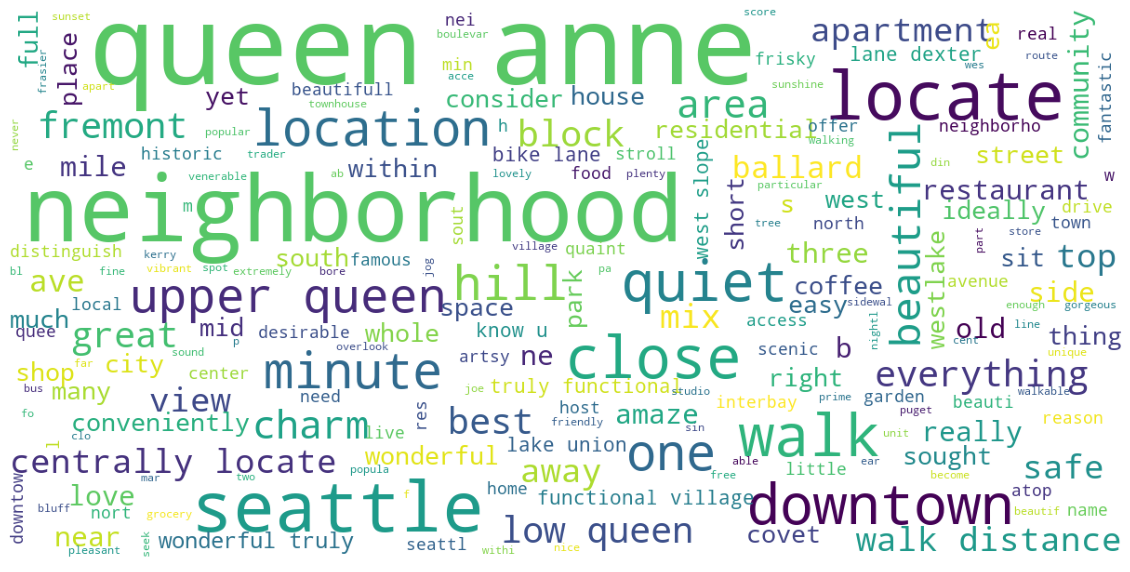

In [121]:
show_wordcloud(listings_clean[listings_clean['neighbourhood']=='Queen Anne']["neighborhood_overview_clean"])

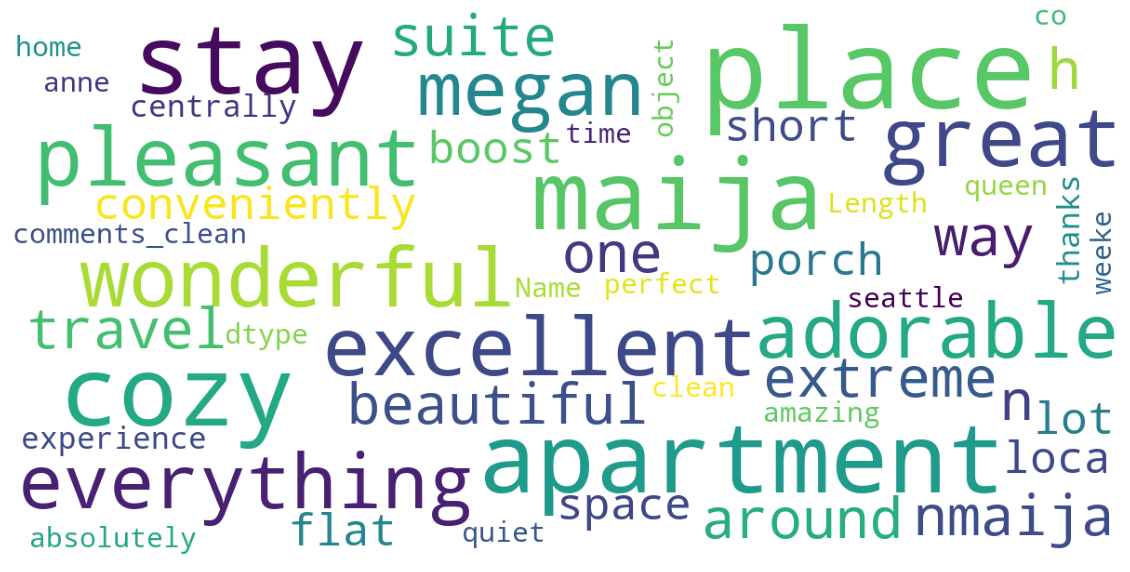

In [122]:
# print wordcloud 
show_wordcloud(review_clean[review_clean['neighbourhood']=='Queen Anne']["comments_clean"])

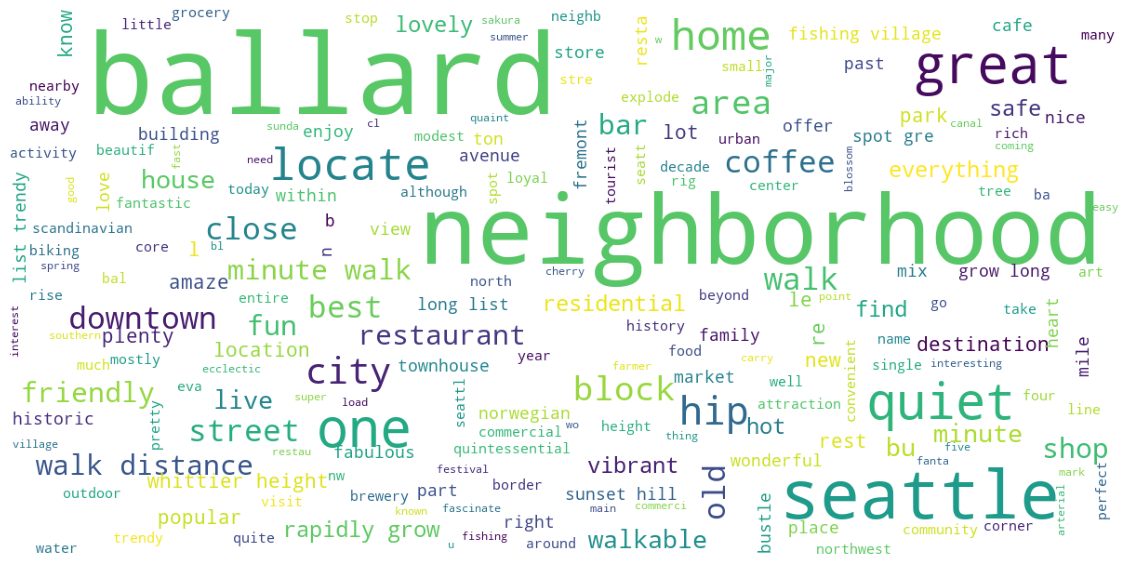

In [143]:
show_wordcloud(listings_clean[listings_clean['neighbourhood']=='Ballard']["neighborhood_overview_clean"])